# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
---    
* [GAN3](#GAN3)
    * [Pix2Pix](#Pix2Pix)
        * [Generator: U-net](#Generator)
        * [Discriminator: Patch GAN](#Discriminator)
    * [CycleGAN](#CycleGAN)


---
##  Segmentation
- pixel단위로 예측해서 정확한 물체 분리
    - semantic segmentation: 동일한 물체는 하나로 봄
### FCN
- fully convolution network: dense 없이 convolution만으로 이루어짐
  - eg. Region Proposal Network
  - FCL(dense) 단점: 1차원화해서 위치정보 날라가며 항상 image 크기를 맞춰야함 
    - convolutionalization : FCL 대신에 1x1 convolution 대체 (OverFeat)
        - 위치 정보 유지
        - 입력영상 크기 제한 받지 않음
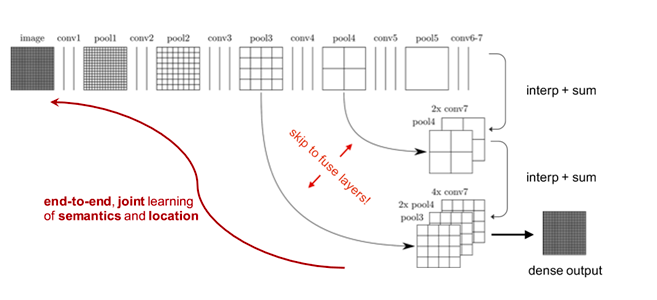 

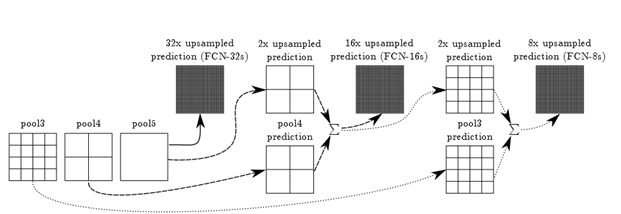
- dense prediction: pixel 단위 예측 
    - 크기별로 32,16,8 배 upsampling (점점더 정확해짐)
    -  skip connection 중간 결과 합침
        - FCN-16s: pool5 결과를  2x upsampling한 것과 pool4의 예측과 합한 후  16x upsampling
        - FCN-8s: FCN-16s 결과를 2x upsampling한 것과 pool3의 예측과 합한후 8x upsampling

   - Downsampling : 여러번 컨볼루션해서 각 점을 예측해서 크기가 원본보다 줄어들어 빨라짐
        - 레이어가 많아질수록 특성을 더 잘 분리함
    - Upsampling :원본 이미지 사이즈 맞추기 
        - upsampling
          - 학습 없이 정한 방식으로 키움
          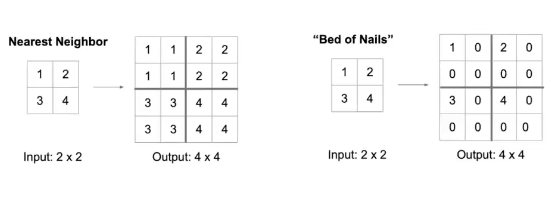
          - 짝을 이루는 레이어의 값을 가져오면 더 정확한 위치의 값을 더 정확하게 맞춤
        - deconvolution
          - conv2dTranspose
          - 학습으로 구해서 non-linear upasmpling

        > - 오토인코더와 비슷한 방식 

### convo2dTranspose
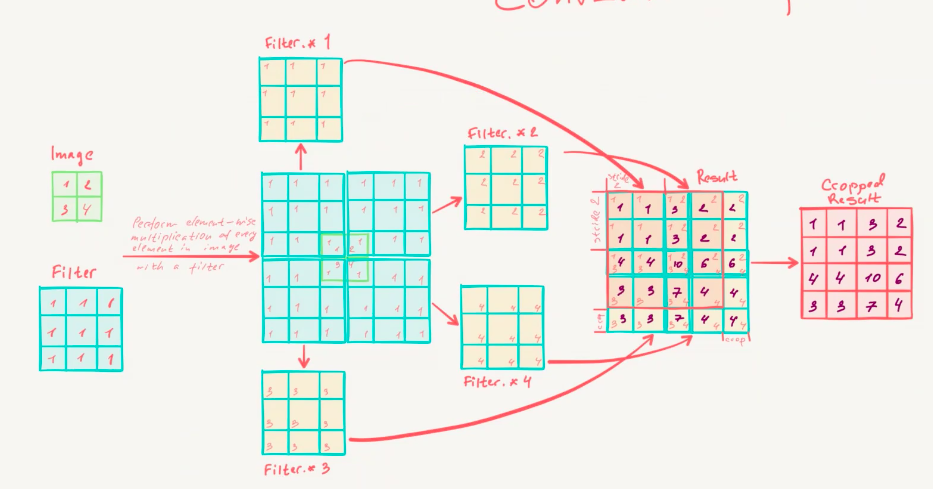
- 컨볼루션 역순으로 학습을 통해서 이미지 확대 
    - 축소된 이미지를 filter 에 element-wise 곱
    - 곱한 결과를 더함
    - stride 통해서 crop
    - eg.  super resolution 
  작은이미지를 고해상도로 바꾸어줌..
  > - 딥러닝은 디버깅: 논문의 수많은 실험 결과
  
  - 성능 더 좋게 하기위해서 skip구조: ResNet, U-net
  - 픽셀기만으로 instance구분 못함.
  예. 두마리의 소가 있으면 하나의 소로 봄
  